In [5]:
import pandas as pd
import numpy as np

In [6]:
df = pd.DataFrame()
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<AxesSubplot:xlabel='X1', ylabel='X2'>

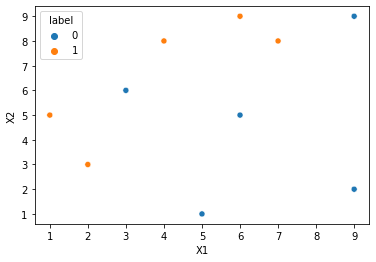

In [7]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [8]:
df['weights'] = 1/df.shape[0]
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [9]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [10]:
# Step 2 - Train 1st model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

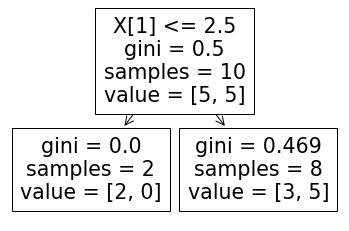

In [11]:
from sklearn.tree import plot_tree
plot_tree(dt1)

In [13]:
df['y_pred'] = dt1.predict(X)
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [14]:
def calculate_model_weight(error):

  return 0.5*np.log((1-error)/(error))

In [15]:
# Step 3 - calculate model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [16]:
# Step 4 - Update weights
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [17]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [18]:
df['updated_weights'].sum()

0.9165153319682015

In [19]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()
df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [20]:
df['nomalized_weights'].sum()

1.0

In [21]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])

In [22]:
df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']

In [23]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,1,0.152653,0.142950,0.309508
3,4,8,1,0.1,1,0.065508,0.309508,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,1,0.065508,0.452458,0.523933
6,6,5,0,0.1,1,0.152653,0.523933,0.690492
7,7,8,1,0.1,1,0.065508,0.690492,0.761967
8,9,9,0,0.1,1,0.152653,0.761967,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [24]:
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [25]:
index_values = create_new_dataset(df)

index_values

[2, 9, 9, 2, 6, 8, 7, 2, 7, 6]

In [26]:
second_df = df.iloc[index_values,[0,1,2,3]]
second_df

,X1,X2,label,weights
2,3,6,0,0.1
9,9,2,0,0.1
9,9,2,0,0.1
2,3,6,0,0.1
6,6,5,0,0.1
8,9,9,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
6,6,5,0,0.1


In [27]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [28]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [29]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'X[1] <= 7.0\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]')]

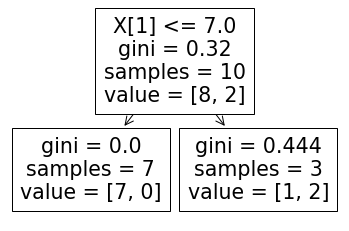

In [30]:
plot_tree(dt2)

In [31]:
second_df['y_pred'] = dt2.predict(X)
second_df

,X1,X2,label,weights,y_pred
2,3,6,0,0.1,0
9,9,2,0,0.1,0
9,9,2,0,0.1,0
2,3,6,0,0.1,0
6,6,5,0,0.1,0
8,9,9,0,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
6,6,5,0,0.1,0


In [32]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [33]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [34]:
second_df['updated_weights'] = second_df.apply(update_row_weights,axis=1)
second_df

,X1,X2,label,weights,y_pred,updated_weights
2,3,6,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
8,9,9,0,0.1,1,0.297427
7,7,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622


In [35]:
second_df['nomalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()
second_df

,X1,X2,label,weights,y_pred,updated_weights,nomalized_weights
2,3,6,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
9,9,2,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
8,9,9,0,0.1,1,0.297427,0.495694
7,7,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034


In [36]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [37]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])

In [38]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']

In [39]:
second_df[['X1','X2','label','weights','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
2,3,6,0,0.1,0,0.056034,0.000000,0.056034
9,9,2,0,0.1,0,0.056034,0.056034,0.112068
9,9,2,0,0.1,0,0.056034,0.112068,0.168102
2,3,6,0,0.1,0,0.056034,0.168102,0.224136
6,6,5,0,0.1,0,0.056034,0.224136,0.280170
8,9,9,0,0.1,1,0.495694,0.280170,0.775864
7,7,8,1,0.1,1,0.056034,0.775864,0.831898
2,3,6,0,0.1,0,0.056034,0.831898,0.887932
7,7,8,1,0.1,1,0.056034,0.887932,0.943966
6,6,5,0,0.1,0,0.056034,0.943966,1.000000


In [40]:
index_values = create_new_dataset(second_df)

In [41]:
third_df = second_df.iloc[index_values,[0,1,2,3]]
third_df

,X1,X2,label,weights
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
2,3,6,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1


In [42]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [43]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
7,7,8,1,0.1,0
6,6,5,0,0.1,1
7,7,8,1,0.1,1
2,3,6,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,0


In [44]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [45]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


## Prediction

In [46]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [47]:
dt2.predict(query)

array([0], dtype=int64)

In [48]:
dt3.predict(query)

array([0], dtype=int64)

In [49]:
alpha1*1 + alpha2*(1) + alpha3*(1)

1.09861228866811

In [50]:
np.sign(1.09)

1.0

In [51]:
query = np.array([9,9]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [52]:
dt2.predict(query)

array([1], dtype=int64)

In [53]:
dt3.predict(query)

array([1], dtype=int64)

In [54]:
alpha1*(1) + alpha2*(-1) + alpha3*(-1)

-0.2513144282809062

In [55]:
np.sign(-0.25)

-1.0

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [58]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

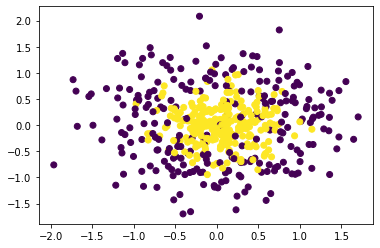

In [59]:
plt.scatter(X[:,0],X[:,1],c=y)

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

abc = AdaBoostClassifier()

np.mean(cross_val_score(abc,X,y,scoring='accuracy',cv=10))

0.786

In [61]:
abc.fit(X,y)

AdaBoostClassifier()

In [62]:
from sklearn.model_selection import GridSearchCV

grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
grid['algorithm'] = ['SAMME', 'SAMME.R']


grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid, n_jobs=-1, cv=10, scoring='accuracy')
# execute the grid search
grid_result = grid_search.fit(X, y)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}
